# EDA of Telco Customer Churn

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys

sys.path.append("../src/")

import edafunc

## Get the data

In [57]:
data_churn = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = data_churn.copy()

In [58]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


None

In [74]:
display(data.describe())

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Form

Let's see the dimensions of the dataset:

In [59]:
shapes = data.shape
print("Nombre de lignes: ", shapes[0])
print("Nombre de colonnes (features + target): ", shapes[1])

Nombre de lignes:  7043
Nombre de colonnes (features + target):  21


In [60]:
value_counts = data["Churn"].value_counts(normalize=True)
print(f"Taux « No »: {np.round(value_counts["No"] * 100, 2)} %")
print(f"Taux « Yes »: {np.round(value_counts["Yes"] * 100, 2)} %")


Taux « No »: 73.46 %
Taux « Yes »: 26.54 %


We observe an imbalance with the the target column : 
- 73.46% for « No »
- 26.54% for « Yes »

### Dataset Adjustment

Let's leave out the « customerID » column, it's not useful the our analysis:

In [61]:
data = data.drop(columns=["customerID"])

In [62]:
# Adjustment using SMOTE
data_balanced = edafunc.oversampling_SMOTE(data, "Churn")

[[0.000e+00 1.000e+00 0.000e+00 ... 1.000e+00 2.000e+00 2.505e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 3.000e+00 1.466e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 3.000e+00 1.570e+02]
 ...
 [0.000e+00 1.000e+00 1.000e+00 ... 1.000e+00 2.000e+00 2.994e+03]
 [1.000e+00 1.000e+00 0.000e+00 ... 1.000e+00 3.000e+00 2.660e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 0.000e+00 5.407e+03]]


Now we can observe that the target column is imbalanced :

<Axes: ylabel='count'>

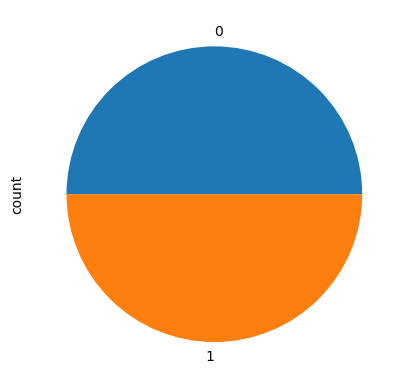

In [63]:
data_balanced["Churn"].value_counts().plot.pie()

Let's analyze the variable types that make up our dataset :

In [64]:
data.dtypes.value_counts()

object     17
int64       2
float64     1
Name: count, dtype: int64

There are :
- **17** objects
- **2** integers
- **1** real

### Missing values

Let's check missing values and duplicates :

In [65]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [66]:
duplicates = data[data.duplicated(keep=False)]
print(duplicates.shape)

(42, 20)


In [67]:
duplicates.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
100,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No
542,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
646,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
662,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No


## Background Analysis

### Churn rate by contract type

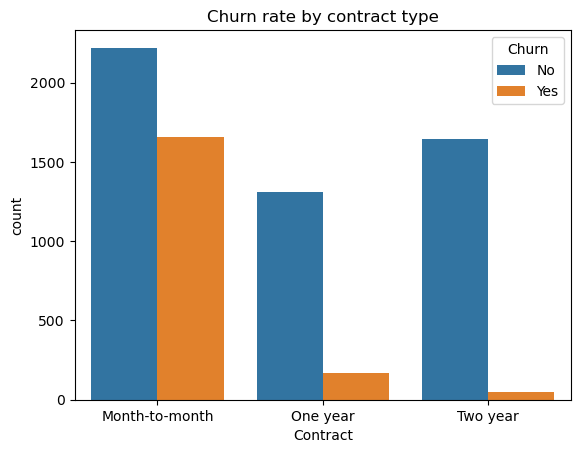

In [68]:
sns.countplot(x='Contract', hue="Churn", data=data)
plt.title("Churn rate by contract type")
plt.show()

### Subscription duration distribution

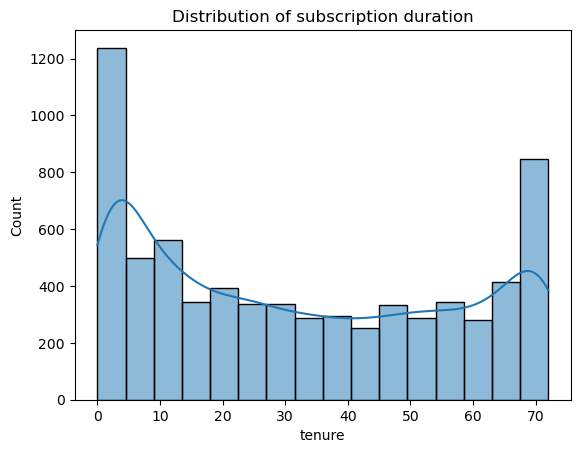

In [69]:
sns.histplot(data["tenure"], kde=True)
plt.title("Distribution of subscription duration")
plt.show()

### Correlation matrix for numerical variables

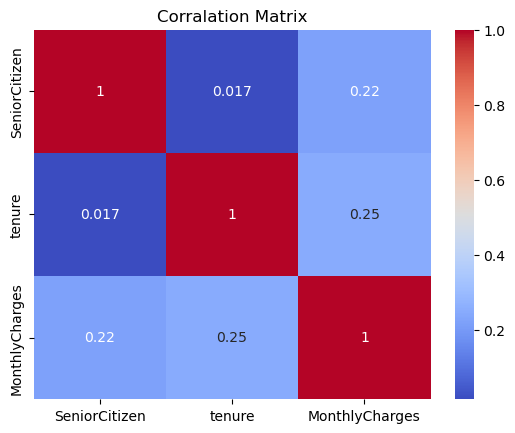

In [72]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Corralation Matrix")
plt.show()

### Bivariate Analysis

#### Relation between MonthlyCharges and Churn

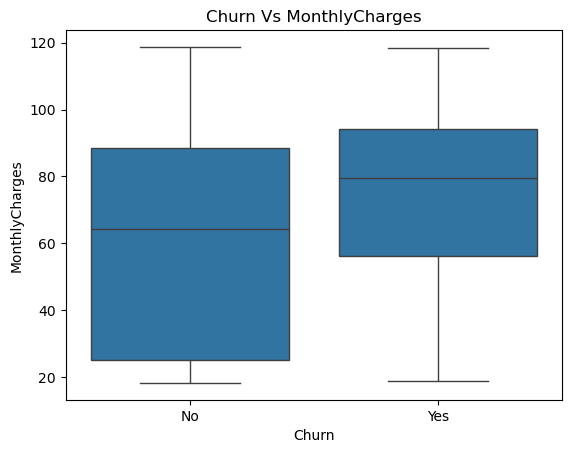

In [75]:
sns.boxplot(x='Churn', y="MonthlyCharges", data=data)
plt.title("Churn Vs MonthlyCharges")
plt.show()

We notice that churn is more frequen with people with high monthly charges.

### Tenure vs Churn

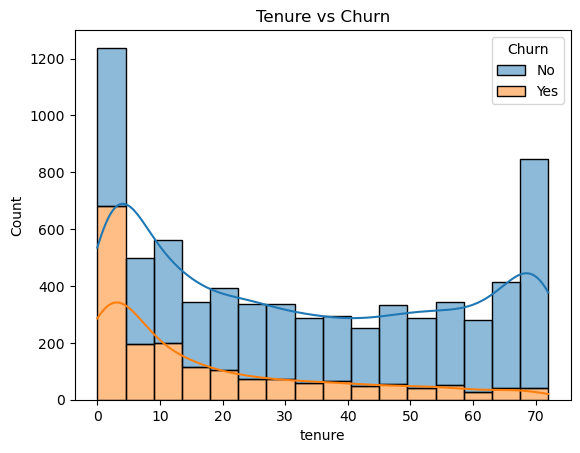

In [76]:
sns.histplot(data=data, x='tenure', hue='Churn', kde=True, multiple='stack')
plt.title("Tenure vs Churn")
plt.show()

We can observe that people with high tenure are less likely to churn.